In [1]:
!python3 -m pip install yolov4

In [2]:
!unzip /content/drive/My\ Drive/Hard_Soft/NN/img2.zip

In [3]:
from tensorflow.keras import callbacks, optimizers
from yolov4.tf import YOLOv4

yolo = YOLOv4()

yolo.classes = {0: "hole"}

yolo.input_size = 608
yolo.batch_size = 32
yolo.subdivision = 16

yolo.make_model()
yolo.load_weights(
    "/content/drive/My Drive/Hard_Soft/NN/yolov4.conv.137", weights_type="yolo"
)

data_set = yolo.load_dataset(
    "/content/drive/My Drive/Hard_Soft/NN/hole_train.txt", dataset_type="yolo",
)

epochs = 1000
lr = 1e-4

optimizer = optimizers.Adam(learning_rate=lr)
yolo.compile(optimizer=optimizer, loss_iou_type="ciou")


def lr_scheduler(epoch):
    if epoch < int(epochs * 0.8):
        return lr
    elif epoch < int(epochs * 0.9):
        return lr * 0.1
    else:
        return lr * 0.01


yolo.fit(
    data_set,
    epochs=epochs,
    callbacks=[
        callbacks.LearningRateScheduler(lr_scheduler),
        callbacks.TerminateOnNaN(),
        callbacks.TensorBoard(
            log_dir="/content/drive/My Drive/Hard_Soft/NN/logs",
        ),
    ],
)

yolo.save_weights(
    "/content/drive/My Drive/Hard_Soft/NN/yolov4-hole-1000.weights",
    weights_type="yolo",
)

Epoch 980/1000
16/16 [==============================] - 18s 1s/step - loss: 27.1674 - output_1_loss: 2.7413 - output_2_loss: 0.0027 - output_3_loss: 3.9705e-05 - lr: 1.0000e-06
Epoch 981/1000
16/16 [==============================] - 18s 1s/step - loss: 26.1354 - output_1_loss: 1.7067 - output_2_loss: 0.0055 - output_3_loss: 3.7170e-05 - lr: 1.0000e-06
Epoch 982/1000
16/16 [==============================] - 18s 1s/step - loss: 26.8955 - output_1_loss: 2.4026 - output_2_loss: 0.0699 - output_3_loss: 3.8196e-05 - lr: 1.0000e-06
Epoch 983/1000
16/16 [==============================] - 18s 1s/step - loss: 27.7007 - output_1_loss: 3.2764 - output_2_loss: 0.0017 - output_3_loss: 4.4406e-05 - lr: 1.0000e-06
Epoch 984/1000
16/16 [==============================] - 18s 1s/step - loss: 26.7809 - output_1_loss: 2.0009 - output_2_loss: 0.3577 - output_3_loss: 4.5071e-05 - lr: 1.0000e-06
Epoch 985/1000
16/16 [==============================] - 18s 1s/step - loss: 26.0575 - output_1_loss: 1.6289 - outpu

time: 591.16 ms


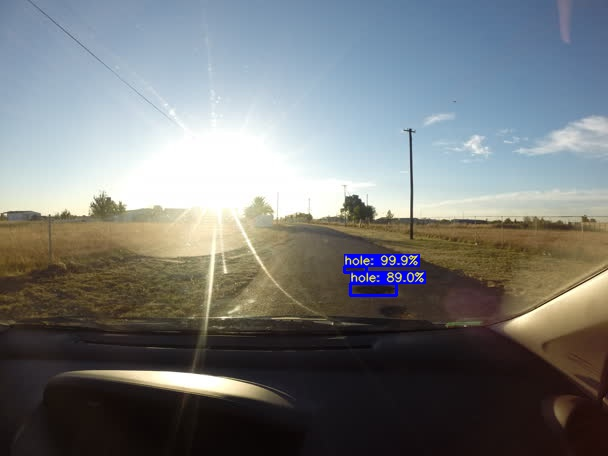

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import time

frame = cv2.imread("img2/G0141815.jpg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

start_time = time.time()
bboxes = yolo.predict(frame)
exec_time = time.time() - start_time
print("time: {:.2f} ms".format(exec_time * 1000))

frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
image = yolo.draw_bboxes(frame, bboxes)
cv2_imshow(image)

In [5]:
%load_ext tensorboard

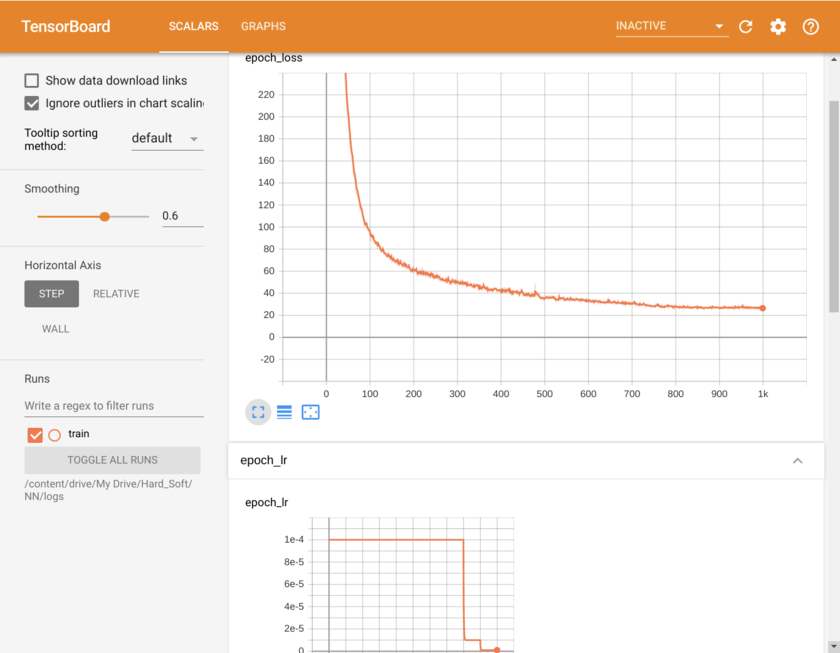

In [6]:
%tensorboard --logdir /content/drive/My\ Drive/Hard_Soft/NN/logs